In [76]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import math



In [77]:
#load data
df_raw = pd.read_csv('../data/predictive_maintenance.csv')

In [78]:
df_raw.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [79]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [80]:
df_raw.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [81]:
#check null values

df_raw.isnull().sum().sum()

0

In [82]:
#check columns
df_raw.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [83]:
#check duplicates
df_raw.duplicated().sum()


0

In [84]:
df_raw.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [101]:
#check unique values under Type column
df_raw['Type'].unique()


array(['M', 'L', 'H'], dtype=object)

In [100]:
# #chech distribution of unique values under Type column in the dataset
# df_raw['Type'].value_counts()

# #plot distribution of unique values under Type column in the dataset
# plt.figure(figsize=(8,4))

# sns.countplot(x='Type', data=df_raw, hue='Type')
# plt.title('Distribution of unique values under Type column in the dataset')

# plt.show()

# #Observation: The dataset has 3 unique values under Type column (M, L, H). Distribution is highly imbalanced with Type L having the highest number of records.


In [102]:
#Check unique values under Failure Type column
df_raw['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

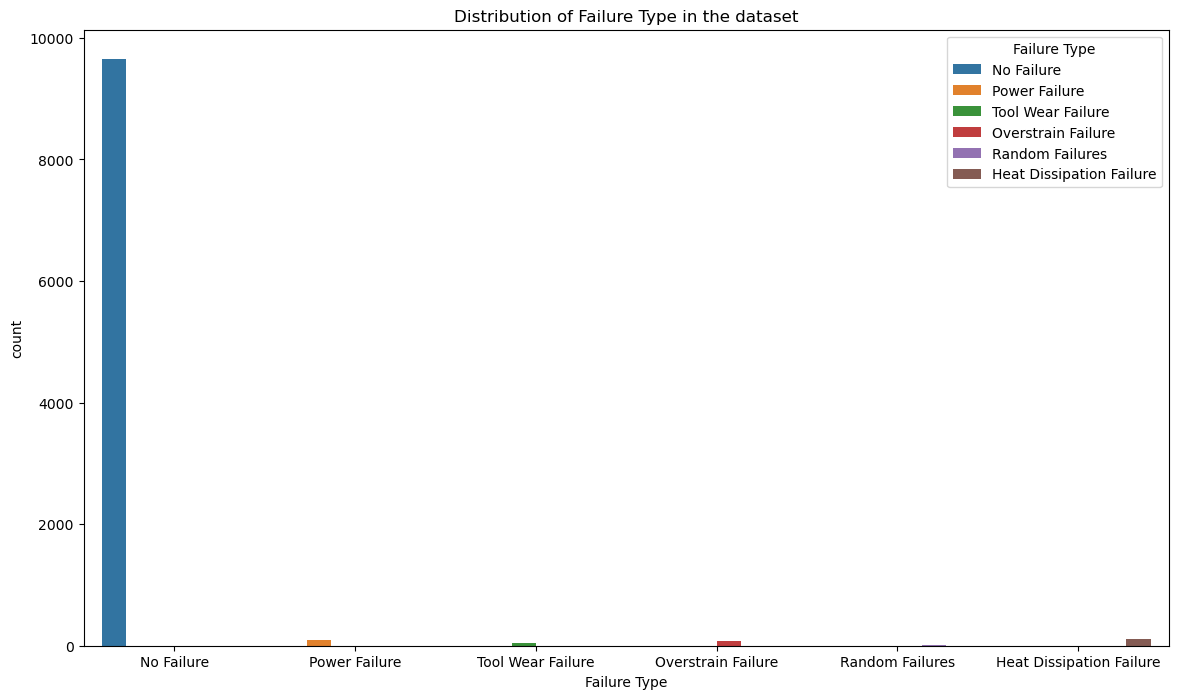

In [99]:
#Plot failure type distribution
plt.figure(figsize=(14,8))

sns.countplot(x='Failure Type', data=df_raw, hue='Failure Type')
plt.title('Distribution of Failure Type in the dataset')

plt.show()



In [103]:
df_raw.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

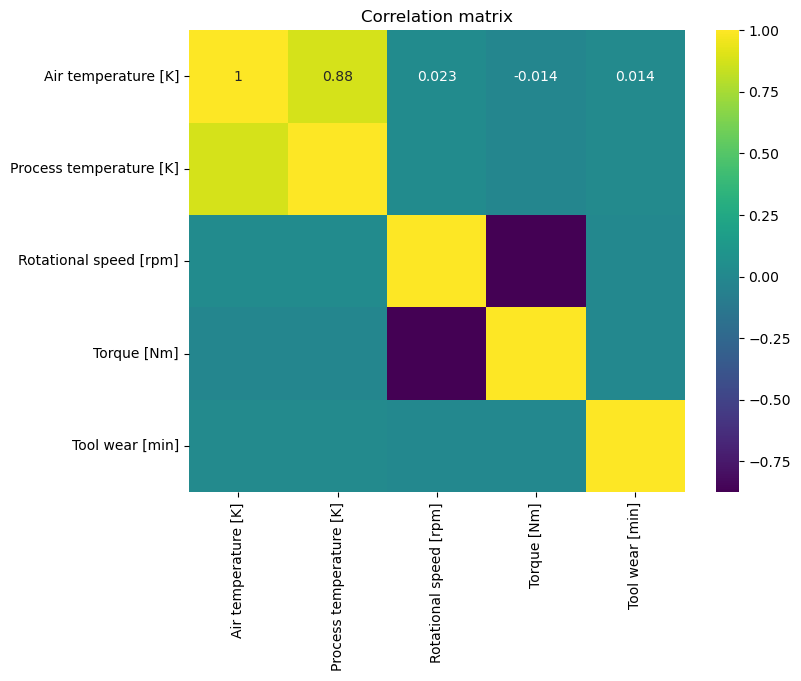

In [88]:
#correlation matrix of using pearson correlation
corr = df_raw[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr(method='pearson')
corr

#plot correlation matrix of 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', using pearson correlation
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation matrix')
plt.show()

In [89]:
df_raw.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

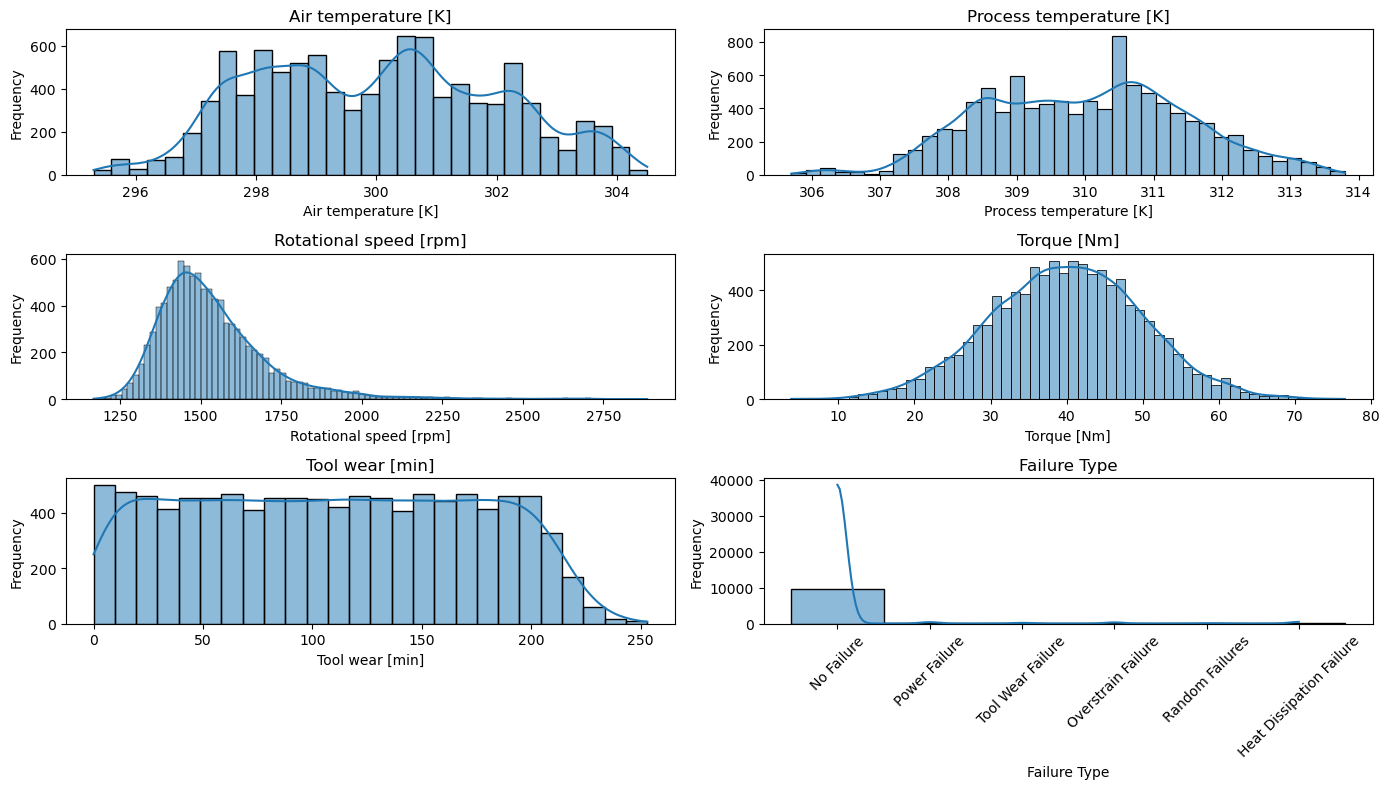

In [90]:
# Define the columns to plot
cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']

# Create a figure
plt.figure(figsize=(14,8))

# Loop over the columns and create subplots
for i, column in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_raw[column], kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # If the column is 'Failure Type', rotate the x-axis labels
    if column == 'Failure Type':
        plt.xticks(rotation=45)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show();

In [91]:
#describe 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type'
df_raw[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']].describe()
df_raw.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

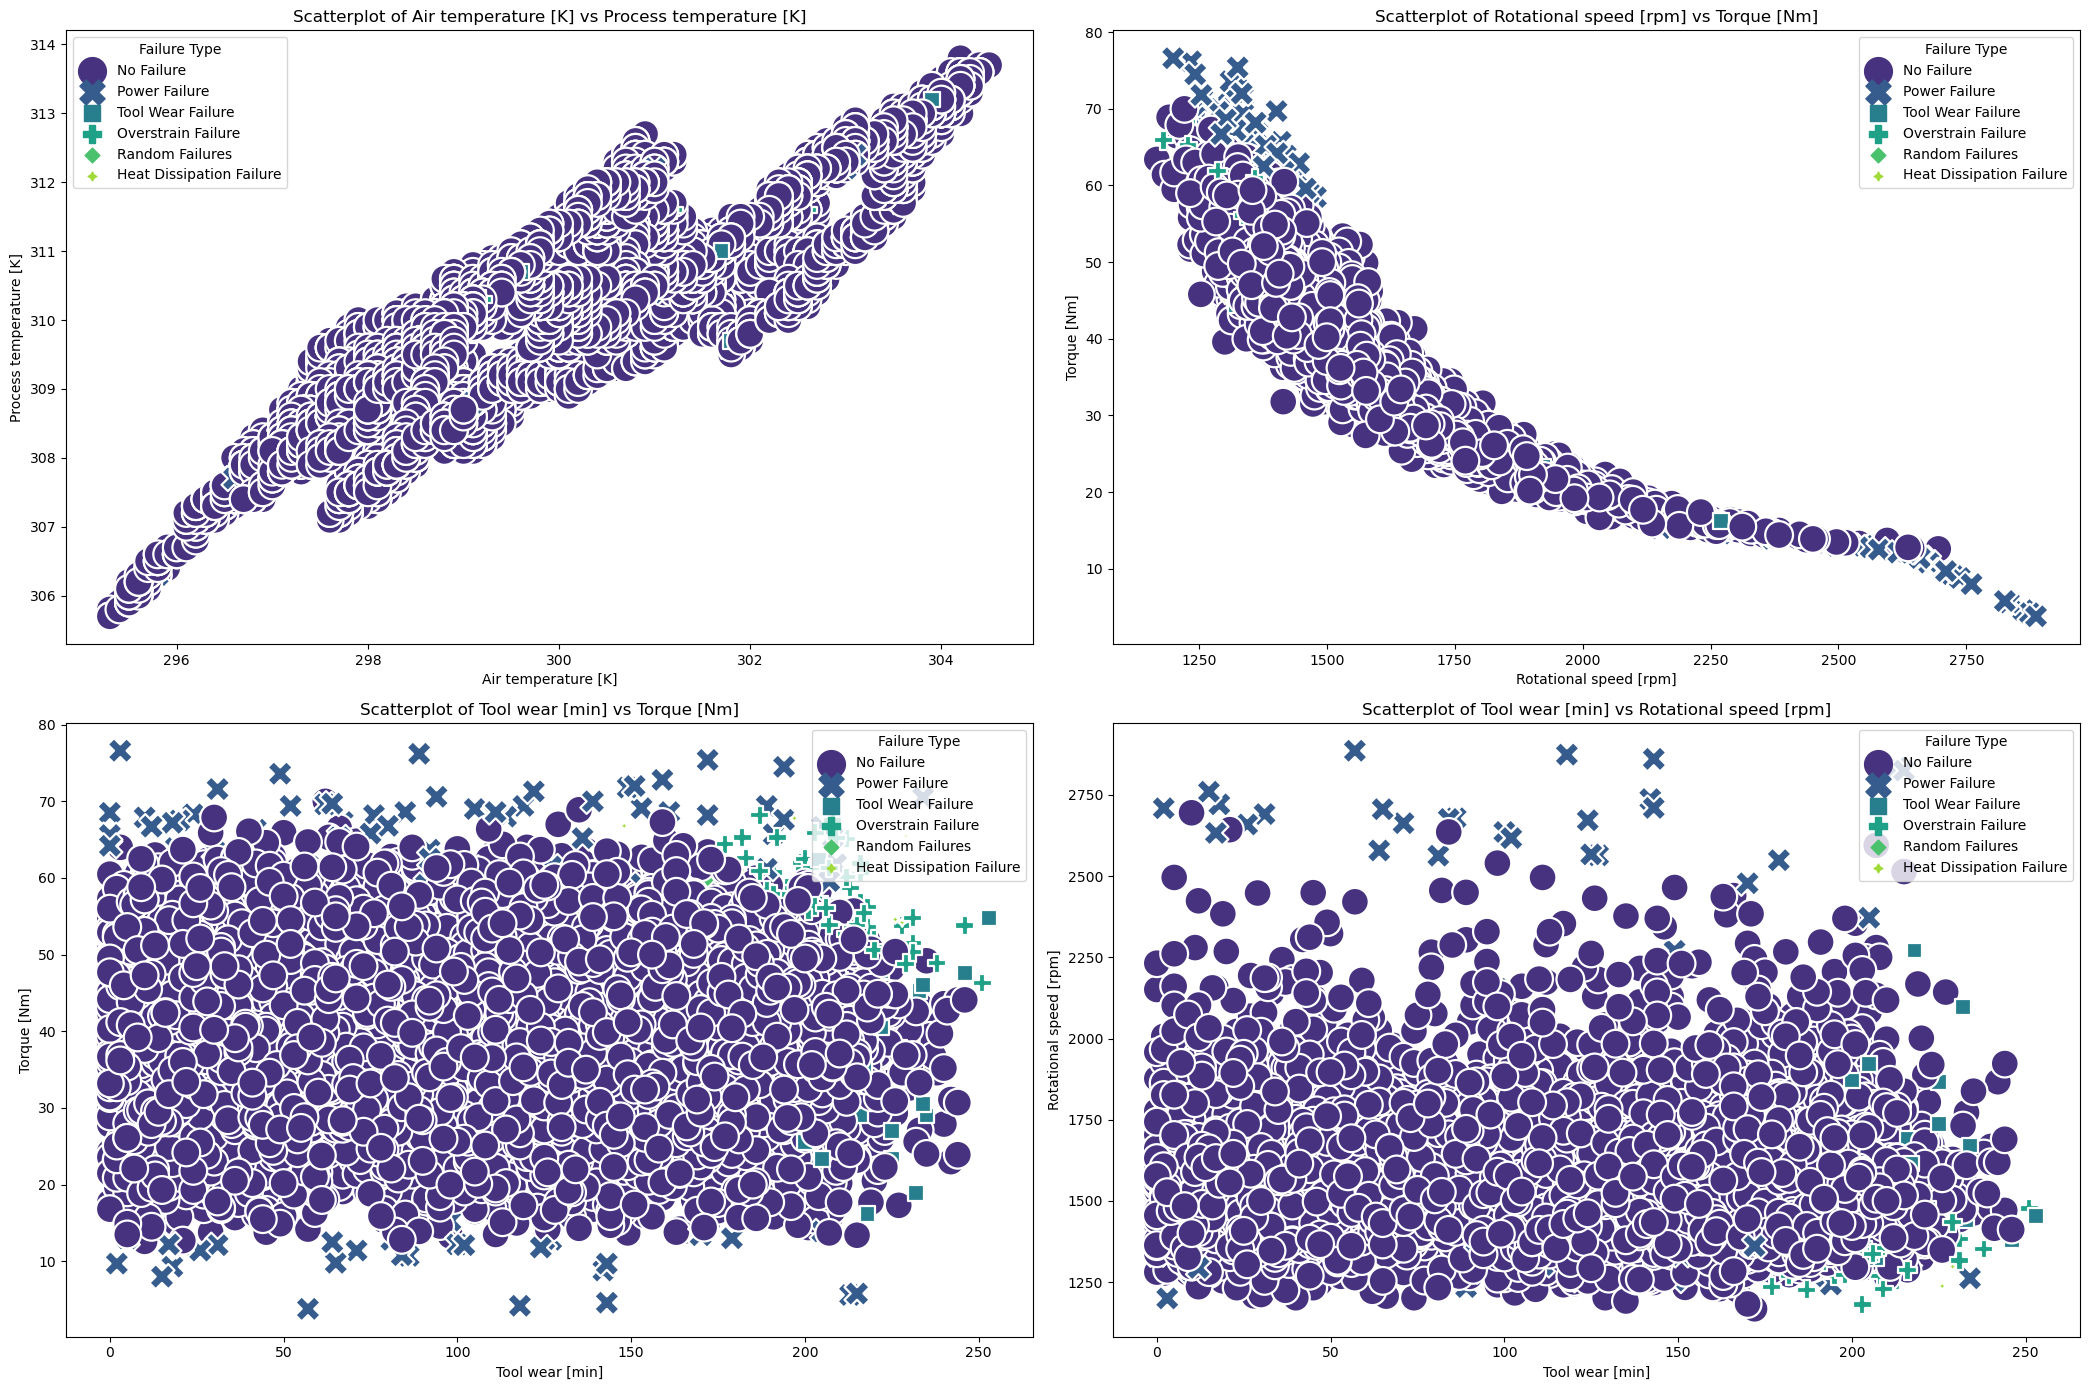

In [92]:
#Relplot of failure type distribution


# Define the figure
fig = plt.figure(figsize=(21, 14))

# First subplot
ax1 = fig.add_subplot(2, 2, 1)
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=df_raw, hue='Failure Type', style='Failure Type', palette='viridis', size='Failure Type', sizes=(40, 400), ax=ax1)
ax1.set_title('Scatterplot of Air temperature [K] vs Process temperature [K]')

# Second subplot
ax2 = fig.add_subplot(2, 2, 2)
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=df_raw, hue='Failure Type', style='Failure Type', palette='viridis', size='Failure Type', sizes=(40, 400), ax=ax2)
ax2.set_title('Scatterplot of Rotational speed [rpm] vs Torque [Nm]')

# Third subplot
ax3 = fig.add_subplot(2, 2, 3)
sns.scatterplot(x='Tool wear [min]', y='Torque [Nm]', data=df_raw, hue='Failure Type', style='Failure Type', palette='viridis', size='Failure Type', sizes=(40, 400), ax=ax3)
ax3.set_title('Scatterplot of Tool wear [min] vs Torque [Nm]')

# Fourth subplot
ax4 = fig.add_subplot(2, 2, 4)
sns.scatterplot(x='Tool wear [min]', y='Rotational speed [rpm]', data=df_raw, hue='Failure Type', style='Failure Type', palette='viridis', size='Failure Type', sizes=(40, 400), ax=ax4)
ax4.set_title('Scatterplot of Tool wear [min] vs Rotational speed [rpm]')

# Adjust the layout
plt.tight_layout()
plt.show()






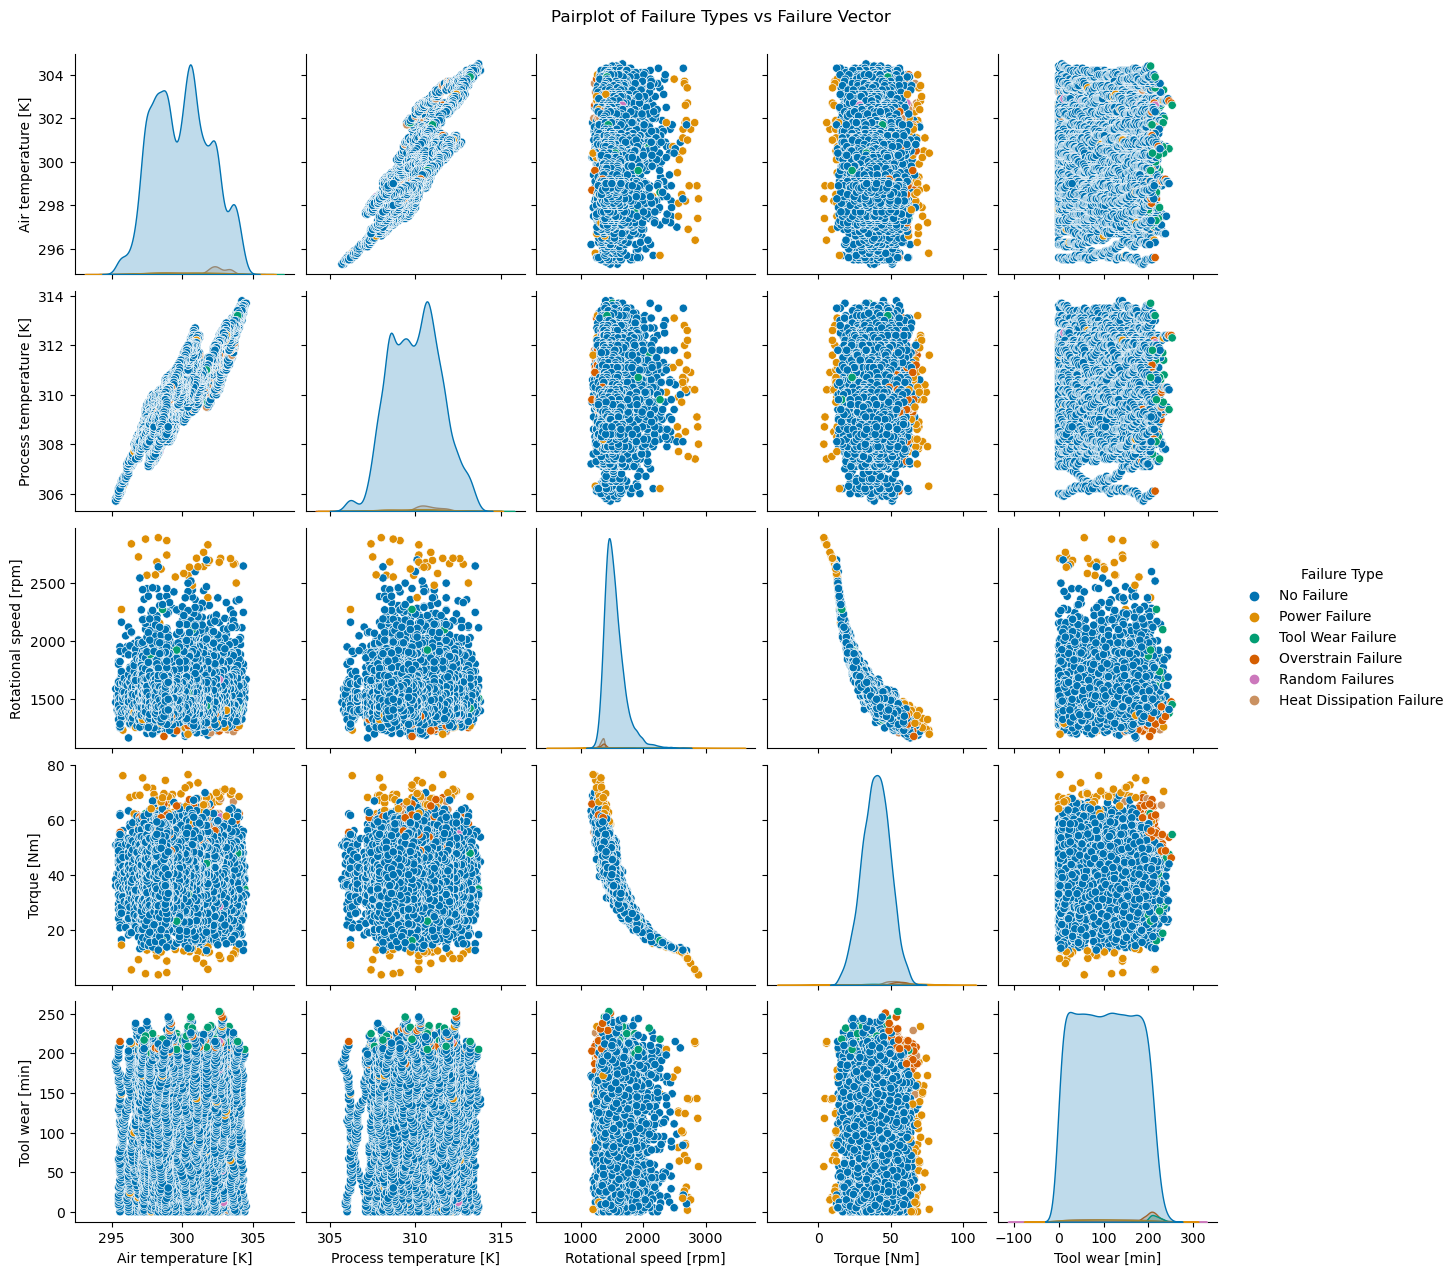

In [125]:
# Pairplot of 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type'
g = sns.pairplot(df_raw[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']], hue='Failure Type', palette='colorblind')

# Set the title for the figure
g.fig.suptitle('Pairplot of Failure Types vs Failure Vector', y=1.02)

plt.show();

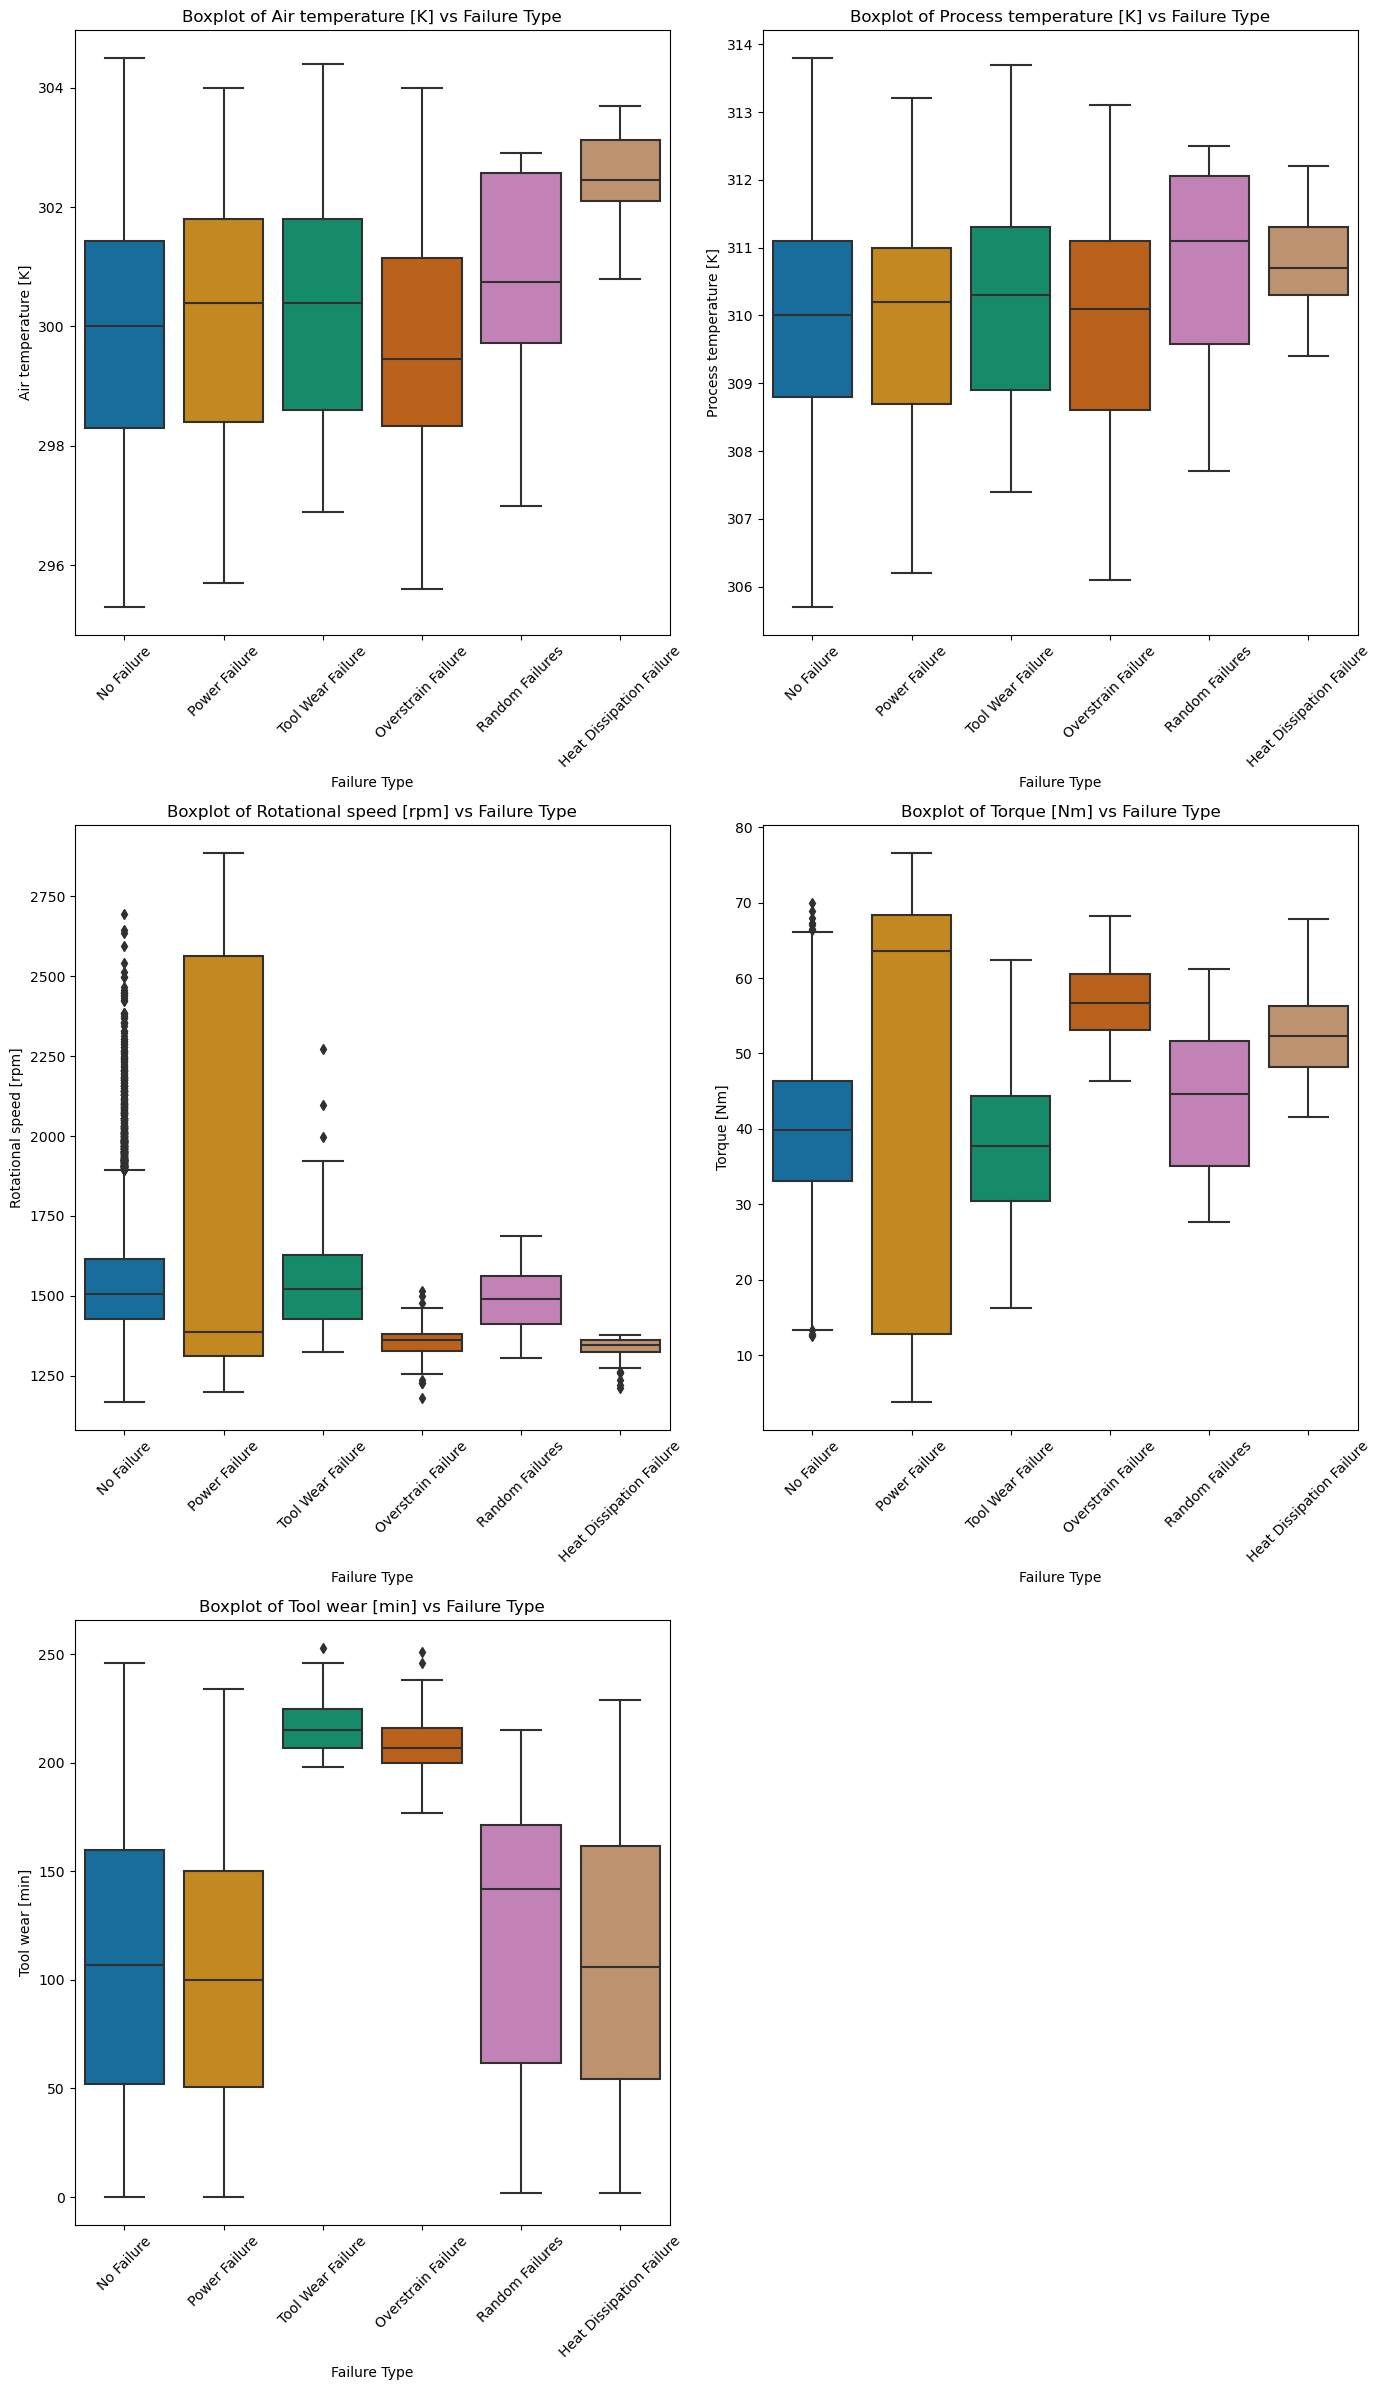

In [124]:

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
n = len(features)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(14, 8*nrows))

for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    boxplot = sns.boxplot(x='Failure Type', y=feature, data=df_raw, palette='colorblind', ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {feature} vs Failure Type')
    boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

# Remove empty subplots
if n % ncols != 0:
    for col in range(n % ncols, ncols):
        fig.delaxes(axs[nrows-1, col])

plt.tight_layout()
plt.show()

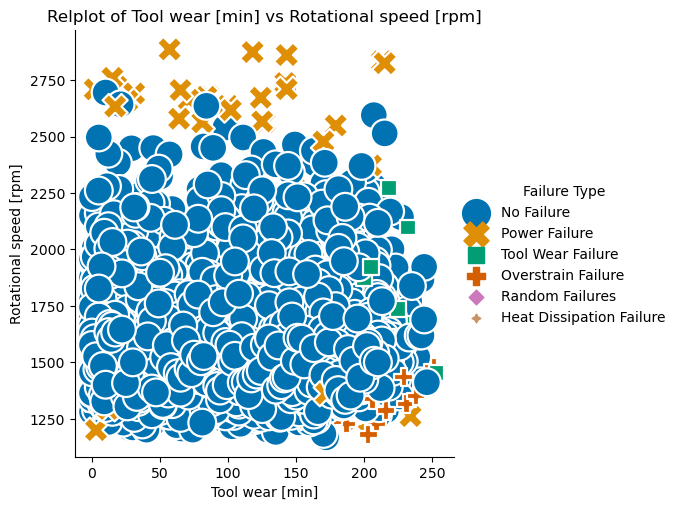

In [123]:
#Relplot x='Tool wear [min]', y='Rotational speed [rpm]', hue='Failure Type'
sns.relplot(x='Tool wear [min]', y='Rotational speed [rpm]', hue='Failure Type', data=df_raw, palette='colorblind', style='Failure Type', size='Failure Type', sizes=(40, 400))
plt.title('Relplot of Tool wear [min] vs Rotational speed [rpm]')
plt.show()